### [숫자 짝꿍](https://school.programmers.co.kr/learn/courses/30/lessons/131128)

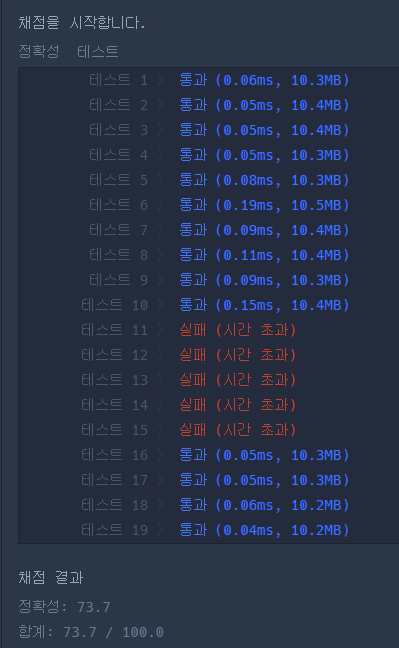

In [ ]:
from collections import Counter

def solution(X, Y):
    X_cnt, Y_cnt =  Counter(X), Counter(Y)
    min_cnt = {v:min(X_cnt[str(v)], Y_cnt[str(v)]) for v in range(10)}

    target = "".join(reversed([str(k)*v for k, v in min_cnt.items() if v]))
    return "-1" if target == '' else str(int(target))

- 마지막 return문에서 int -> str으로 타입변환하는데 시간이 많이 걸림

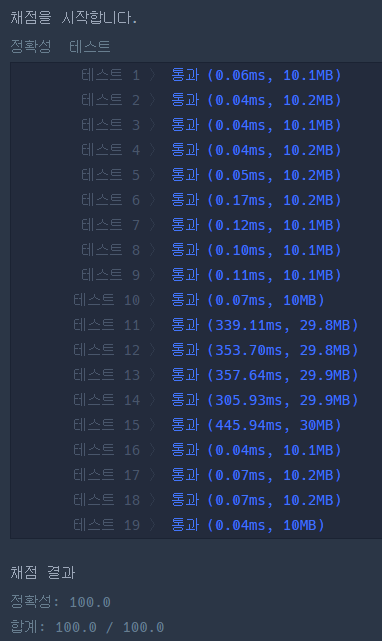

In [ ]:
from collections import Counter

def solution(X, Y):
    X_cnt, Y_cnt =  Counter(X), Counter(Y)
    min_cnt = {v:min(X_cnt[str(v)], Y_cnt[str(v)]) for v in range(10)}

    target = "".join(reversed([str(k)*v for k, v in min_cnt.items() if v]))
    if target == '':
        return '-1'
    elif target[0] == '0':
        return '0'
    else:
        return target

### [동영상 재생기](https://school.programmers.co.kr/learn/courses/30/lessons/340213)

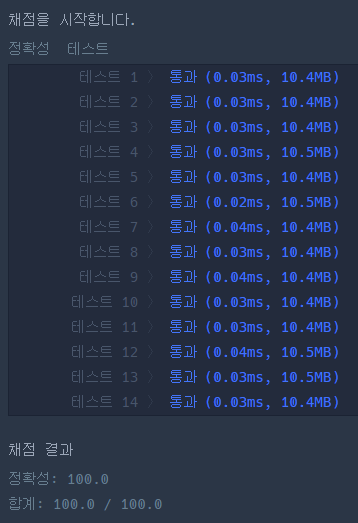

In [2]:
def to_seconds(times):
    x, y = times.split(":")
    return int(x)*60 + int(y)

def to_minutes(times):
    x, y = divmod(times, 60)
    x, y = str(x), str(y)
    if len(x) == 1:
        x = '0' + x
    if len(y) == 1:
        y = '0' + y
    return x + ":" + y

def solution(video_len, pos, op_start, op_end, commands):
    video_len = to_seconds(video_len)
    pos = to_seconds(pos)
    op_start = to_seconds(op_start)
    op_end = to_seconds(op_end)
    
    for command in commands:
        if op_start <= pos <= op_end:
            pos = op_end
            
        if command == 'next':
            pos += 10
            pos = min(pos, video_len)
        else :
            pos -= 10      
            pos = max(pos, 0)
            
    if op_start <= pos <= op_end:
        pos = op_end
    return to_minutes(pos)

### [[PCCE 기출문제] 10번 / 공원](https://school.programmers.co.kr/learn/courses/30/lessons/340198)

- dp를 이용한 풀이

In [12]:
def solution(mats, park):
    binary_park = [[1 if x == "-1" else 0 for x in p] for p in park]
    
    if not binary_park[0]:
        return -1
    
    rows = len(park)
    cols = len(park[0])
    max_side = 0
    
    # DP 테이블 초기화
    dp = [0] * (cols+1)
    prev = 0
    
    # 각 지점을 모든 정사각형의 오른쪽 아래로 보고 진행
    for r in range(rows):
        for c in range(1, cols+1):
            temp = dp[c]
            if binary_park[r][c-1] == 1:
                # dp[c] : 이전 행의 같은 열까지 고려한 정사각형의 최대크기
                # dp[c-1] : 현재 행의 이전 열까지 고려한 정사각형의 최대 크기
                # prev : 이전 행의 이전 열까지 고려한 정사각형의 최대 크기 (대각선 위 셀)
                dp[c] = min(dp[c], dp[c-1], prev) + 1
                max_side = max(max_side, dp[c])
            else :
                dp[c] = 0
            prev = temp
    
    target = [x for x in mats if x <= max_side]
    return max(target) if target else -1

[[0, 0, 1, 0, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 0, 0, 1],
 [1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 1, 1, 1, 1, 0, 1],
 [0, 0, 1, 1, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 1, 0, 1]]